# Exploratory flux calibration

In [1]:
from muler.hpf import HPFSpectrum, HPFSpectrumList
import numpy as np
import glob

%config InlineBackend.figure_format='retina'

Here we have Goldilocks spectra:

In [2]:
path = 'https://github.com/OttoStruve/muler_example_data/raw/main/HPF/01_A0V_standards/'
filename = 'Goldilocks_20210212T072837_v1.0_0037.spectra.fits'

We can easily read in HPF data for a specific spectral order:

In [3]:
original_spectrum = HPFSpectrum(file=path+filename, order=4)

In [4]:
spectrum = original_spectrum.sky_subtract(method='vector').trim_edges().remove_nans().deblaze().normalize()

Now we can normalize and overplot plot the observed spectrum, sky subtracted spectrum, and the sky emission itself:

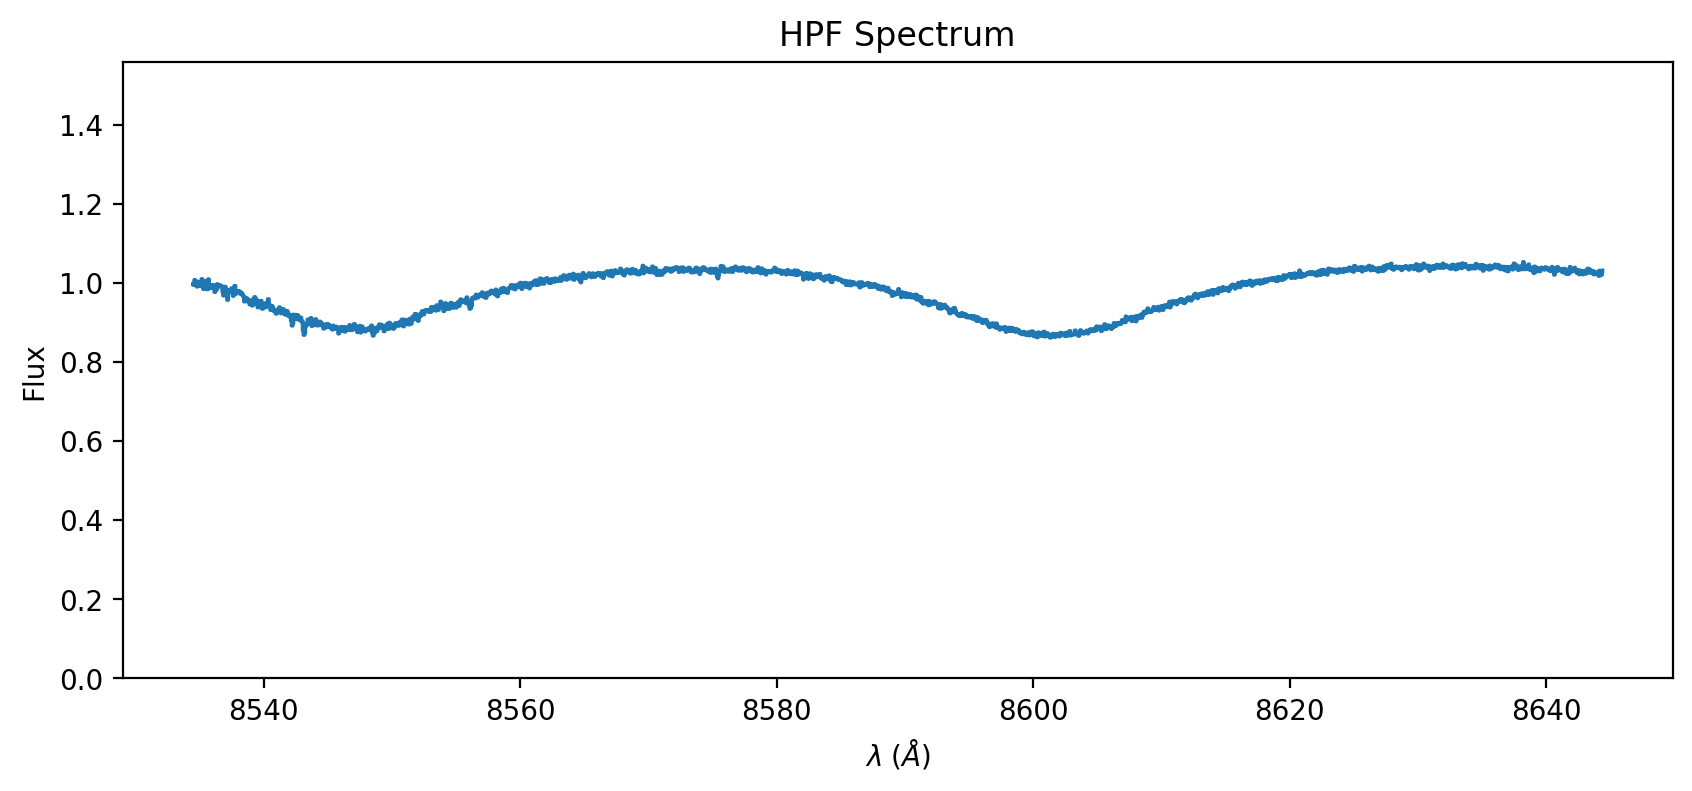

In [5]:
spectrum.plot();

In [6]:
from gollum.phoenix import PHOENIXGrid

In [7]:
grid = PHOENIXGrid(teff_range=(10_000, 10_200), logg_range=(4,4), Z_range=(0,0))

Processing Teff=10200K|log(g)=4.00|Z=+0.0: 100%|██| 2/2 [00:00<00:00, 28.38it/s]


In [8]:
len(grid)

2

In [9]:
raw_model1, raw_model2 = grid[0], grid[1]

## Finding: we should allow the `grid` object to accept all of these arguments:

In [10]:
#grid.rotationally_broaden(130.0)
#grid.instrumental_broaden(55_000)
#grid.resample(spectrum)

In [11]:
model1 = raw_model1.rotationally_broaden(130.0).instrumental_broaden(55_000).resample(spectrum)
model2 = raw_model2.rotationally_broaden(130.0).instrumental_broaden(55_000).resample(spectrum)

In [12]:
factor = 0.2

In [13]:
mixture_model = factor * model1 + (1-factor) * model2

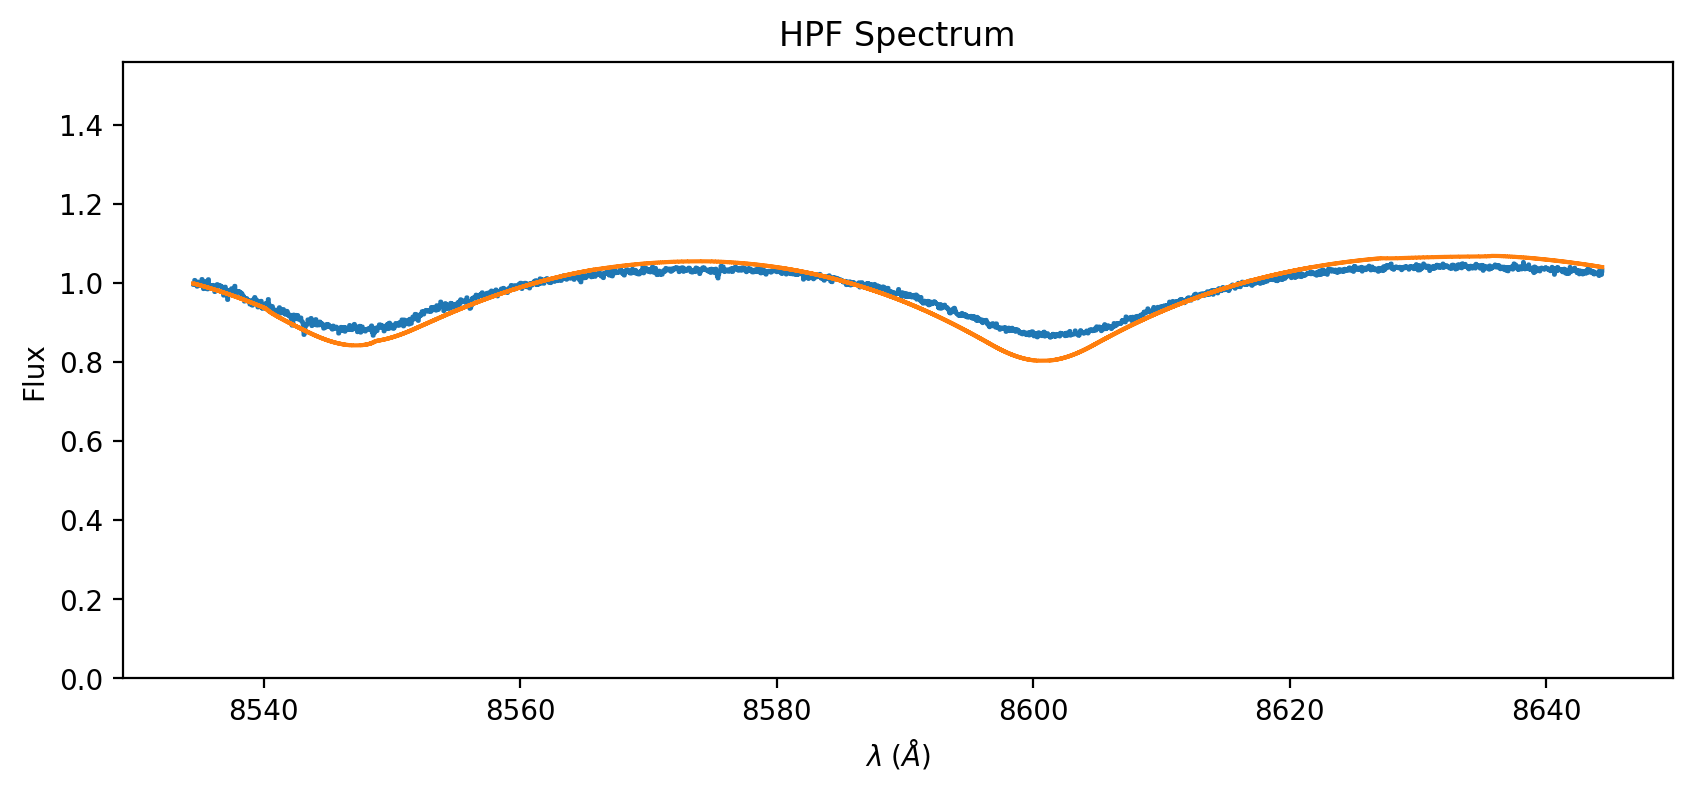

In [14]:
ax = spectrum.plot()
mixture_model.normalize().plot(ax=ax);